**Importing Libraries**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Loading Mnist Dataset**

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


** Visualising some Data**

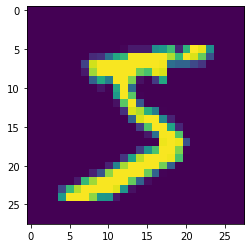

In [6]:
plt.imshow(X_train[0]);

**Scaling  the Images**

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

**Now lets Add one more dimension to let our CNN know that it is Single GrayScale imagesNow lets Add one more dimension to let our CNN know that it is Single GrayScale images**

In [9]:
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [10]:
X_test.shape

(10000, 28, 28, 1)

** Creating CNN Model and Optimize it using Keras Tuner**

In [11]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=d899d4aec91ff8ca7888f58b9e7947d2a612dbc7004a6c898509e5cac82c6a86
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=3571239f26df305001f16a4caa979d16638a637ebda0ee1167e95fa405fcb895
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [12]:
import tensorflow as tf
from tensorflow import keras
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter',min_value = 32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
            activation='relu',input_shape=(28,28,1)),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter',min_value = 32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
            activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units',min_value=32, max_value=128, step=16),activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [13]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [14]:
tuner_search = RandomSearch(build_model,
objective='val_accuracy',
max_trials=5,
directory='output',project_name='Mnist')

In [16]:
tuner_search.search(X_train,y_train_new,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3238 - accuracy: 0.1106 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 2/3
1688/1688 [==============================] - 21s 13ms/step - loss: 2.3025 - accuracy: 0.1107 - val_loss: 2.3048 - val_accuracy: 0.1050
Epoch 3/3
1688/1688 [==============================] - 22s 13ms/step - loss: 2.3027 - accuracy: 0.1091 - val_loss: 2.3030 - val_accuracy: 0.1050


Epoch 1/3
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1884 - accuracy: 0.9458 - val_loss: 0.1073 - val_accuracy: 0.9702
Epoch 2/3
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0896 - accuracy: 0.9733 - val_loss: 0.0747 - val_accuracy: 0.9795
Epoch 3/3
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0673 - accuracy: 0.9800 - val_loss: 0.0807 - val_accuracy: 0.9803


Epoch 1/3
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1286 - accuracy: 0.9613 - val_loss: 0.0562 - val_accuracy: 0.9850
Epoch 2/3
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0449 - val_accuracy: 0.9872
Epoch 3/3
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0578 - val_accuracy: 0.9837


Epoch 1/3
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1181 - accuracy: 0.9641 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 2/3
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0502 - val_accuracy: 0.9882
Epoch 3/3
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0443 - val_accuracy: 0.9892


Epoch 1/3
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1257 - accuracy: 0.9615 - val_loss: 0.0533 - val_accuracy: 0.9845
Epoch 2/3
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0491 - val_accuracy: 0.9857
Epoch 3/3
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0378 - val_accuracy: 0.9892


INFO:tensorflow:Oracle triggered exit


In [17]:
model = tuner_search.get_best_models(num_models=1)[0]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 80)        224080    
_________________________________________________________________
flatten (Flatten)            (None, 38720)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1239072   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 1,464,602
Trainable params: 1,464,602
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train_new, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0619 - val_accuracy: 0.9870
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0516 - val_accuracy: 0.9887
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0504 - val_accuracy: 0.9893
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0512 - val_accuracy: 0.9900
Epoch 8/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0670 - val_accuracy: 0.9892
Epoch 9/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0612 - val_accuracy: 0.9908
Epoch 10/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0617 

In [24]:
metrices = pd.DataFrame(model.history.history)

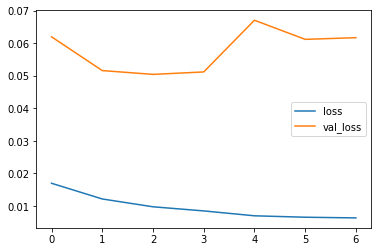

In [25]:
metrices[['loss','val_loss']].plot()

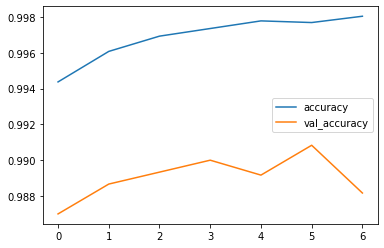

In [26]:
metrices[['accuracy','val_accuracy']].plot()

In [27]:
model.evaluate(X_train,y_train_new)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.0131 - accuracy: 0.9965


[0.013106167316436768, 0.9965166449546814]

In [29]:
model.save('model.h5')